# Estimación por mínimos cuadrados
_Nicolás Villegas Vargas, María Camila Vásquez Correa_

Modelación Experimental, 2019-1

### ARMA: Datos artificiales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generamos datos con los siguientes parámetros

In [2]:
A = np.matrix([[.75,-0.25],[1, 0]])
D = np.matrix([[.65,.35],[0,0]])

In [9]:
# Simulacion de datos
p = 2
q = 2
nobs = 250
X = np.zeros((250,p))
# condicion inicial
X[0] = np.array([-0.5,-1.4])
# Ruido
e = np.random.normal(size=nobs)

In [10]:
for i in range(1, nobs):
    X[i] = X[i-1]*A.transpose() + np.array([e[i-1],e[i]])*D.transpose()

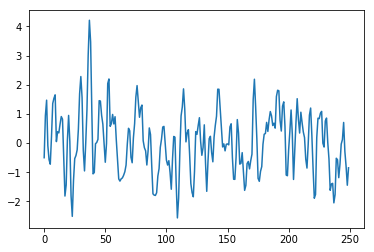

In [12]:
plt.plot(X.transpose()[0])
plt.show()

### Ordinary Least Squares

### Estimación de parámetros

In [13]:
def ols(X, t):
    V = []
    V = X[0].transpose()*X[1]
    G = X[0].transpose()*X[0]
    for i in range(1,t):
        V += X[i].transpose()*X[i+1]
        G += X[i].transpose()*X[i]
    return V.transpose()*np.linalg.inv(G)    

In [14]:
X = np.matrix(X)
c1 = []
c2 = []
for t in range(1, nobs-1):
    c = ols(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

In [15]:
a1 = [A.A1[0] for _ in range(nobs)]
a2 = [A.A1[1] for _ in range(nobs)]

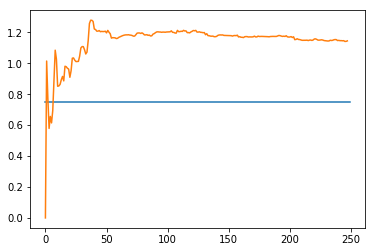

In [16]:
plt.plot(a1)
plt.plot(c1)
plt.show()

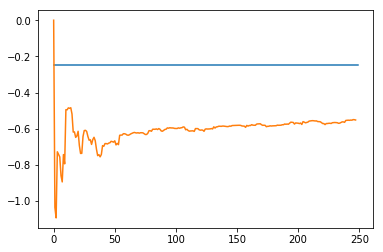

In [17]:
plt.plot(a2)
plt.plot(c2)
plt.show()

## Instrumental Variables

In [31]:
def IVols(X,t):
    V = []
    V = X[0].transpose()*X[2]
    G = X[2].transpose()*X[1]
    for i in range(1,t):
        V += X[i].transpose()*X[i+2]
        G += X[i+2].transpose()*X[i]
    return V.transpose()*np.linalg.inv(G)    

In [35]:
X = np.matrix(X)
c1 = []
c2 = []
for t in range(3, nobs-1):
    c = IVols(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

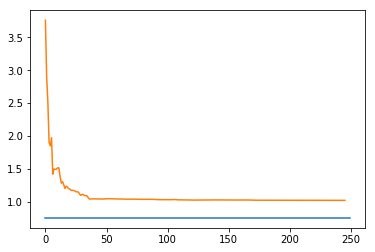

In [36]:
plt.plot(a1)
plt.plot(c1)
plt.show()

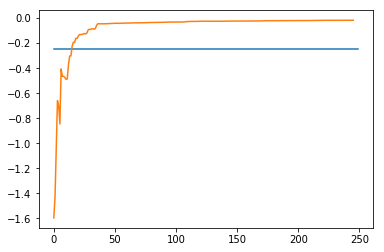

In [37]:
plt.plot(a2)
plt.plot(c2)
plt.show()

### Recursive Least Squares

In [45]:
V0 = X[0].transpose()*X[1]
G0 = X[0].transpose()*X[0]
R0 = np.linalg.inv(G)
C0 = V0.T*R0

In [49]:
R1 = R0 - (R0*X[1].T*X[1]*R0)/(1+X[1]*R0*X[1].T)

In [47]:
X[0]

matrix([[-0.5, -1.4]])

In [56]:
C1 = C0 + (X[2].T - C0*X[1].T)*X[1]*R1

In [59]:
ols(X,0)

matrix([[0., 0.],
        [0., 0.]])

In [57]:
C1

matrix([[ 7.63117621e+16, -1.88321688e+17],
        [-4.05104538e+16,  9.99714439e+16]])

In [ ]:
def RLS(X, t):
    V = X[0].transpose()*X[1]
    G = X[0].transpose()*X[0]
    R = np.linalg.inv(G)
    C = V0.T*R0
    for i in range(1, t):
        R -= (R*X[i].T*X[i]*R)/(1+X[i]*R*X[i].T)
        C += (X[i+1].T - C*X[i].T)*X[i]*R